<a href="https://colab.research.google.com/github/ankygupta9999/DL-image-captioning/blob/main/DL_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
import pandas as pd
import pickle
import os

DIR_PATH = "/content/gdrive/MyDrive/Datasets"
pickle_path = os.path.join(DIR_PATH, "set_1.pkl")

objects = pd.read_pickle(pickle_path)
print('First entry in pickle file:')
print(objects[0], '\n')
print('Total entries in pickle file = ', len(objects), '\n')

First entry in pickle file:
2089122314_40d5739aef.jpg#3	A fluffy , tri-colored dog be run down a road with a paper in its mouth . 

Total entries in pickle file =  25000 



In [ ]:
import zipfile

image_path = os.path.join(DIR_PATH, "Image_captioning_Dataset.zip")

with zipfile.ZipFile(image_path, 'r') as zip_ref:
    zip_ref.extractall(DIR_PATH)

In [13]:
raw_df = pd.DataFrame()

for i, row in enumerate(objects):
  img_dict = {}
  img_dict['img_nm'] = str(row).split('#')[0]
  img_dict['caption_id'] = row.split(img_dict['img_nm'])[1].split('\t')[0]
  img_dict['img_caption'] = row.split('\t')[1]
  raw_df =raw_df.append(img_dict, ignore_index=True)

raw_df.head()

,caption_id,img_caption,img_nm
0,#3,"A fluffy , tri-colored dog be run down a road ...",2089122314_40d5739aef.jpg
1,#0,A crowd of person be stand together on a sidew...,1295671216_cde1b9c9d1.jpg
2,#4,"The man and boy sit on the ground , next to a ...",3183195185_cd0ff994a1.jpg
3,#1,A brown dog be play with a white fluffy stuff ...,2949353587_64c54e9589.jpg
4,#2,A man hike with a large backpack and two pole ...,361092202_3d70144ebd.jpg


In [19]:
raw_df.info(verbose=True)
print('\n')
print('Unique image names = ', len(raw_df.img_nm.unique()), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   caption_id   25000 non-null  object
 1   img_caption  25000 non-null  object
 2   img_nm       25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


Unique image names =  8033 



In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def print_sample_imgs(img_dir, pics, nrows, ncols, nimages, df):
  nrows = nrows
  ncols = ncols

  # Index for iterating over images
  pic_index = 0
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols * 6, nrows * 3)

  print("======================================================")
  print("============== Printing Sample images ================")
  print("======================================================")
  j = 1
  for i, img_nm in enumerate(pics):
    if i < nimages:
      # print ("printing {} , image :{}".format(i, img_nm))
      caption = list(df[df['img_nm'] == img_nm]['img_caption'])[0]
      just_img_nm = img_nm.split(sep='.')[0]
      # Set up subplot; subplot indices start at 1
      sp = plt.subplot(nrows, ncols, j)
      sp.axis('Off') # Don't show axes (or gridlines)
      sp.set_title("Img # "+ str(i+1) + " - Caption :" +caption, loc='left')
      raw_img_nm = img_dir + '/' + img_nm
      img = mpimg.imread(raw_img_nm)
      plt.imshow(img)

      j = j + 1
    else:
      break
  plt.show()

============== Printing Sample images ================


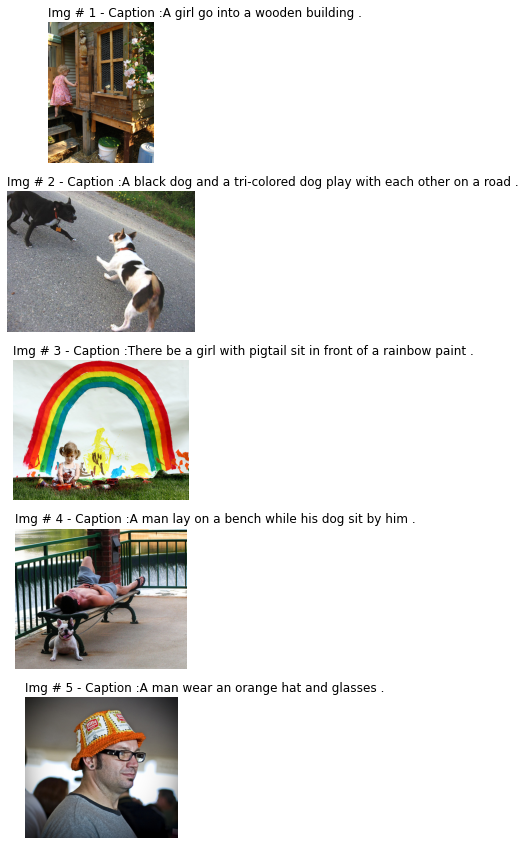

In [12]:
image_dir = os.path.join(DIR_PATH, "Flicker8k_Dataset")
print_sample_imgs(image_dir, os.listdir(image_dir), nrows=5, ncols=1, nimages=5, df=raw_df)